In [14]:
from processed import *
from ingest import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import logging
import os

In [15]:
def main():

    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger(__name__)
    logger.setLevel(logging.INFO)

    PATH_SERVICE_EXM_PACIENTES_SP = "../lake/service/exames_por_pacientes_sp"

    logger.info('Inicia o job de análise')
    df_exames_pacientes_sp = pd.read_parquet(path=PATH_SERVICE_EXM_PACIENTES_SP)
    logger.info('Carregado os dados exames_por_pacientesdo do data lake')

   
    df_exames_pacientes_sp_filtrado = df_exames_pacientes_sp.loc[
        (df_exames_pacientes_sp["DE_RESULTADO"] == "Não detectado")
        | (df_exames_pacientes_sp["DE_RESULTADO"] == "Ausentes")
    ]
    logger.info('Filtrado o dataset com base nos dados qualitativos de DE_RESULTADO')
    
    cont_analitos = (
        df_exames_pacientes_sp_filtrado["DE_ANALITO"]
        .value_counts()
        .sort_values(ascending=False)
    )
    logger.info('Realizada a contagem dos valores do campo DE_ANALITO')

    analito_log = np.log(cont_analitos)

    
    plt.title("Registros de Analitos")
    plt.xlabel("Analitos")
    plt.ylabel("Frequência")
    plt.hist(analito_log, bins=6)
    plt.show()
    logger.info('Criado o gráfico histograma com base nos registros de analitos')


    exames = df_exames_pacientes_sp_filtrado["DE_EXAME"]
    analito = df_exames_pacientes_sp_filtrado["DE_ANALITO"]

    
    plt.title("Exames por Analitos")
    plt.xlabel("Analitos")
    plt.ylabel("Exames")
    plt.bar(analito, exames)
    plt.xticks(rotation=90)
    plt.show()
    logger.info('Criado o gráfico de barras com base em exames por analitos')

    logger.info('Finalizada a análise')

INFO:__main__:Inicia o job de análise
INFO:__main__:Carregado os dados exames_por_pacientesdo do data lake
INFO:__main__:Filtrado o dataset com base nos dados qualitativos de DE_RESULTADO
INFO:__main__:Realizada a contagem dos valores do campo DE_ANALITO


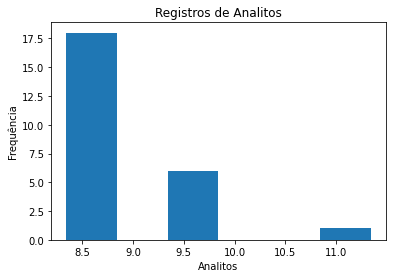

INFO:__main__:Criado o gráfico histograma com base nos registros de analitos


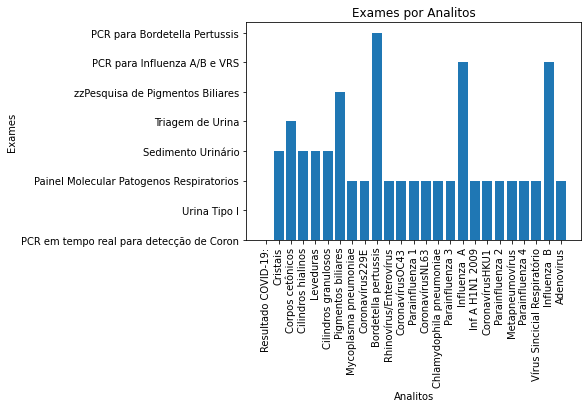

INFO:__main__:Criado o gráfico de barras com base em exames por analitos
INFO:__main__:Finalizada a análise


In [16]:
if __name__ == "__main__":
    main()